__IDENTIFICAÇÃO: MARCOS AURÉLIO RAMOS MELO MATRICULA:2119177__

>**TEMA DO PROJETO**

>**CLASSIFICAÇÃO DOS DADOS PARA CONCEDER EMPRESTIMO AS PESSOAS CONFORME SUA VIDA SOCIAL**

Com os avanços da internet e consequentemente dos dados que são disponibilizados as empresas que lidam com emprestimos e investimentos tem cada vez mais soluçoes para seus clientes.

Para ter uma melhor acurácia na hora de conceder emprestimos, as empresas estão usando algoritimos de machine learning para conseguir uma melhor precisão na decisão de conceder crédito ou mesmo indicar o melhor investimento para as pessoas.

Com os dados aumentando de forma exponencial, as empresas estão aumentando o seu alcance e conseguindo com isso uma forma de obter mais insights para melhorar as sua bases e ter uma melhor visão para nao ter prejuizos elevados na hora da concessão de crédito.

>**OBJETIVO DO PROJETO**

Esse projeto tem como objetivo a classificação e acurácia nos dados.

>**DADOS TÉCNICOS**

Os Dados estão disponíveis no link abaixo:

>[Kaggle](https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior)

>**FORMATO DOS DADOS**

* Esse dataset está no formato CSV e possui 13 colunas e 252.000 linhas compostas por números e categorias.

>**Tarefa de Aprendizado**

* Será aplicado tratamento nos dados para saber se tem dados vazios(isnull) , duplicados(duplicated) ou inválidos.
* Será feito agrupamento(groupby) dos dados para saber as quantidades de cada coluna e se estão no mesmo padrão.
* Caso necessário serão feitas mudanças nos nomes das colunas(columns) que estão em ingles, para que fique mais claro o entendimento e também a exlusão de colunas que não serão necessarias para o projeto.

>**Algoritimos de aprendizado que poderão ser usados**

* Será usado Classificação dos dados usando os algoritmos necessarios para melhor precisão do resultado através do aprendizado supervisionado.
* Matplotlib, sklearn, numpy, pandas, seaborn , estatistica, sabendo que ainda podem ter mudanças no meio do processo de aprendizagem de máquina e usar outros processos alem desses.

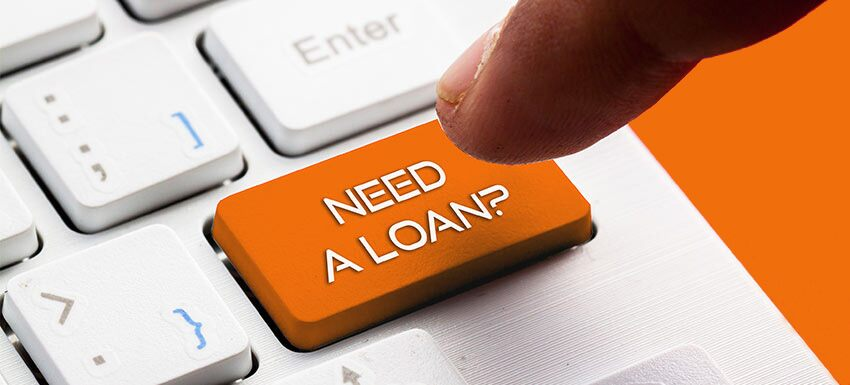

__IMPORTAÇÃO DAS BIBLIOTECAS__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import sklearn.metrics as metric
from xgboost import XGBClassifier
import seaborn as sbn
from sklearn import svm

__CARREGANDO OS DADOS__

In [2]:
data = pd.read_csv("train.csv")

__Mostrando as 5 primeira linhas dos dados__

In [3]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


__MOSTRANDO QUANTIDADE DE LINHAS E COLUNAS__

In [4]:
data.shape

(252000, 13)

__VERIFICANDO DADOS VAZIOS__

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


__DESCREVENDO ALGUNS DADOS ESTATISTICOS DAS COLUNAS NUMERICAS__

In [6]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


__EXCLUINDO ALGUMAS COLUNAS__

In [7]:
data.drop(columns = ["Id","Profession","CITY","STATE"], axis  = 1, inplace = True)

__VERIFICANDO OS DADOS APOS EXCLUSÃO DAS COLUNAS__

In [8]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1


__RENOMEANDO OS NOMES DAS COLUNAS__

In [9]:
data.columns = ["Renda","Idade","Experiencia","Casado/Solteiro","Moradia","Carro","Anos no Trabalho","Tempo de Moradia","Bandeira de Risco"]

__MOSTRANDO OS DADOS APOS RENOMEAR AS COLUNAS__

In [10]:
data.head()

,Renda,Idade,Experiencia,Casado/Solteiro,Moradia,Carro,Anos no Trabalho,Tempo de Moradia,Bandeira de Risco
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1


__MOSTRANDO A DISTRIBUIÇÃO DO DADOS NAS COLUNAS NÚMERICAS__

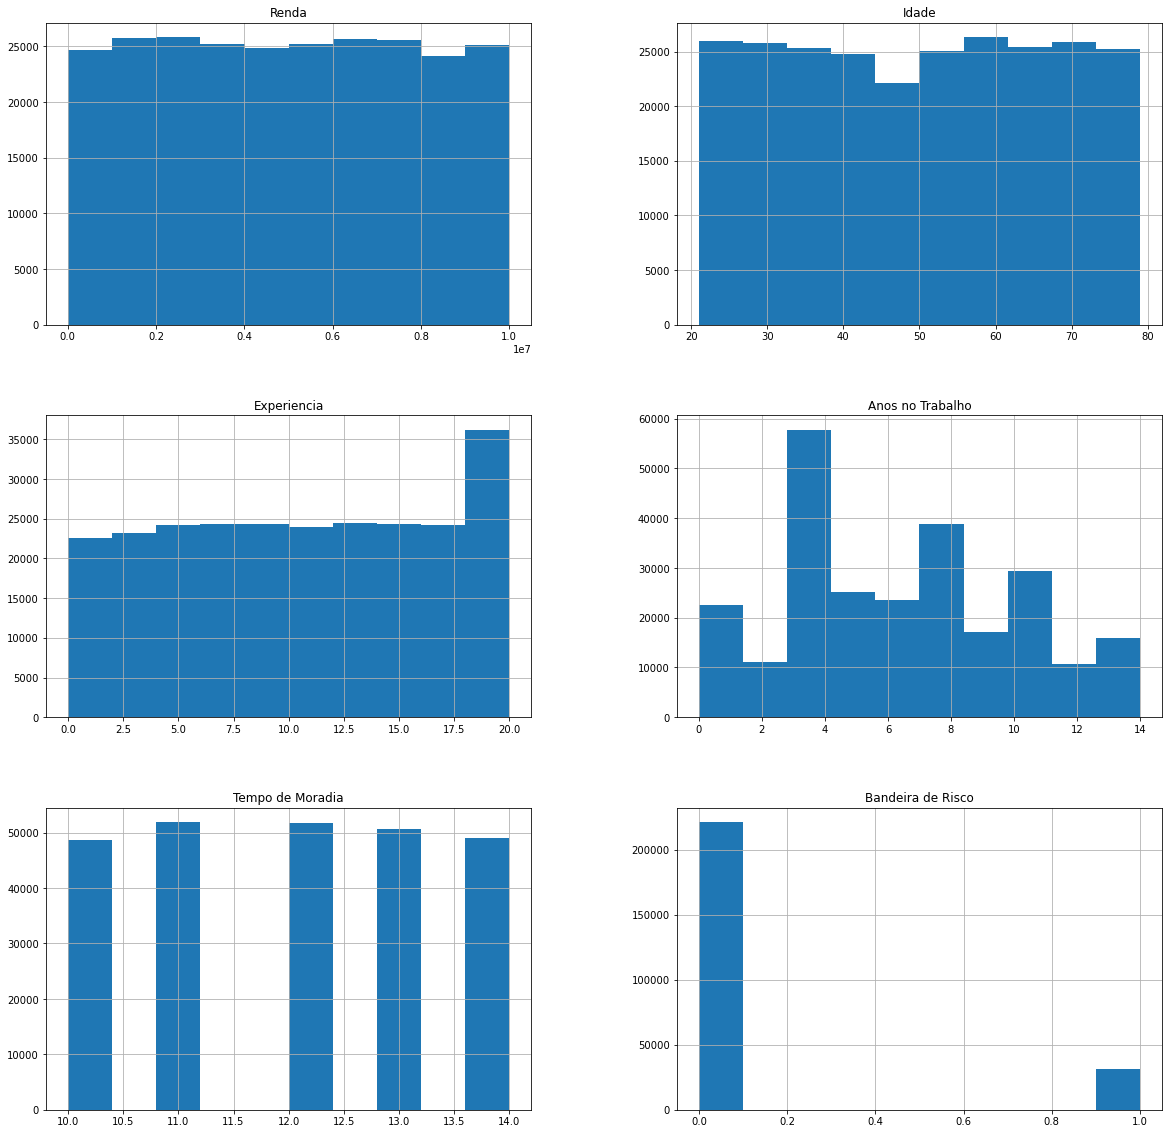

In [11]:
data.hist( figsize = (20, 20) )
plt.style.use("fivethirtyeight")

__AGRUPANDO OS DADOS E MOSTRANDO GRAFICAMENTE__

In [12]:
agp = data.groupby(["Bandeira de Risco"]).size()
agp

Bandeira de Risco
0    221004
1     30996
dtype: int64

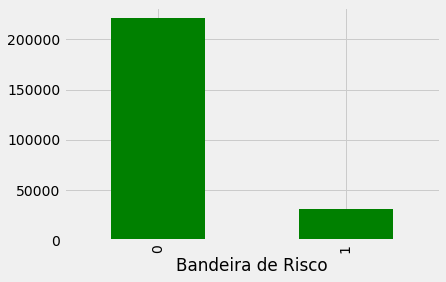

In [13]:
agp.plot.bar(color = "green")
plt.style.use("fivethirtyeight")

__VERIFICANDO OS DADOS CATEGORICOS__

In [14]:
agp = data.groupby(["Casado/Solteiro"]).size()
agp

Casado/Solteiro
married     25728
single     226272
dtype: int64

<AxesSubplot:xlabel='Casado/Solteiro'>

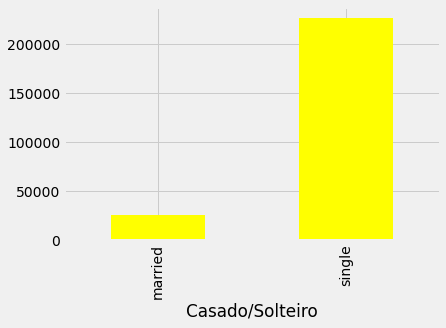

In [15]:
agp.plot.bar(color = "yellow")

In [16]:
agp = data.groupby(["Moradia"]).size()
agp

Moradia
norent_noown      7184
owned            12918
rented          231898
dtype: int64

<AxesSubplot:xlabel='Moradia'>

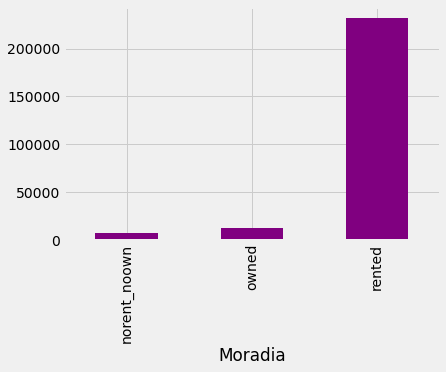

In [17]:
agp.plot.bar(color = "purple")

In [18]:
agp = data.groupby(["Carro"]).size()
agp

Carro
no     176000
yes     76000
dtype: int64

<AxesSubplot:xlabel='Carro'>

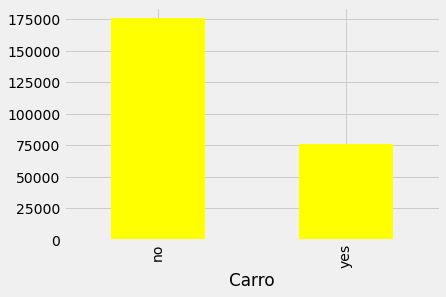

In [19]:
agp.plot.bar(color = "yellow")

([<matplotlib.patches.Wedge at 0x2677aae0dc0>,
 [Text(-1.0188922925859059, 0.4145581938751625, '0'),
  Text(1.018892263475599, -0.4145582654218472, '1')])

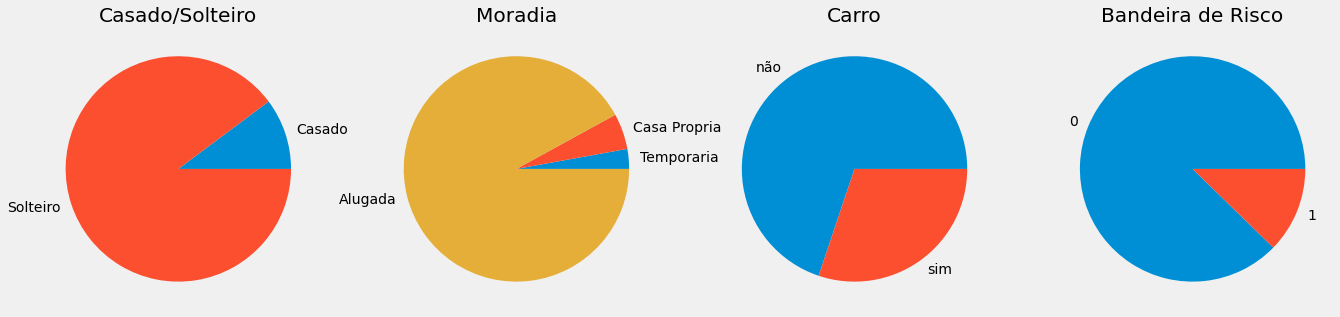

In [20]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
label_age=['Casado','Solteiro']
plt.title("Casado/Solteiro")
plt.pie(data.groupby(data["Casado/Solteiro"]).size(),labels=label_age)

plt.subplot(1,4,2)
label_ed=['Temporaria','Casa Propria','Alugada']
plt.title("Moradia")
plt.pie(data.groupby(data["Moradia"]).size(),labels=label_ed)

plt.subplot(1,4,3)
label_car=['não','sim']
plt.title("Carro")
plt.pie(data.groupby(data["Carro"]).size(),labels=label_car)

plt.subplot(1,4,4)
plt.title("Bandeira de Risco")
label_r=[0,1]
plt.pie(data.groupby(data["Bandeira de Risco"]).size(),labels=label_r)

__TRANSFORMANDO OS DADOS CATEGORICOS__

In [21]:
label_encoder = LabelEncoder()

for col in ["Casado/Solteiro","Moradia","Carro"]:
    data[col] = label_encoder.fit_transform( data[col] )

__MOSTRANDO OS DADOS__

In [22]:
data.head()

,Renda,Idade,Experiencia,Casado/Solteiro,Moradia,Carro,Anos no Trabalho,Tempo de Moradia,Bandeira de Risco
0,1303834,23,3,1,2,0,3,13,0
1,7574516,40,10,1,2,0,9,13,0
2,3991815,66,4,0,2,0,4,10,0
3,6256451,41,2,1,2,1,2,12,1
4,5768871,47,11,1,2,0,3,14,1


__DIVIDINDO OS DADOS EM TREINO E TESTE__

In [68]:
x = data.drop("Bandeira de Risco", axis=1)
y = data["Bandeira de Risco"]

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify = y, random_state = 1)

__USANDO CLASSIFICADOR__

In [74]:
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)

__MELHORANDO O MODELO E USANDO O PRIMEIRO CLASSIFICADOR RANDOMFOREST__

In [78]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)

In [83]:
y_pred = model.predict(x_test)

__VERIFICANDO A ACURACIA DO MODELO__

In [84]:
accuracy_score(y_test, y_pred)

0.8771031746031746

__USANDO O SEGUNDO CLASSIFICADOR CROSS VALIDATION__

In [85]:

rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
from sklearn.model_selection import cross_val_score
model = cross_val_score(estimator=rf,X=x_train,y=y_train,cv=10)


__VERIFICANDO A ACURACIA DO TERCEIRO MODELO__

In [86]:
accu = accuracy_score(y_test,y_pred)
print(accu)

0.8966931216931217


__USANDO O TERCEIRO MODELO REGRESSÃO__

In [87]:
model = LogisticRegression(max_iter=100, random_state=30)
model.fit(x_train,y_train)
predictions_model = model.predict(x_test)
print("accuracy score: " + str(accuracy_score(predictions_model, y_test)))

accuracy score: 0.8769973544973545


__FAZENDO A PREDIÇÃO DO MODELO__

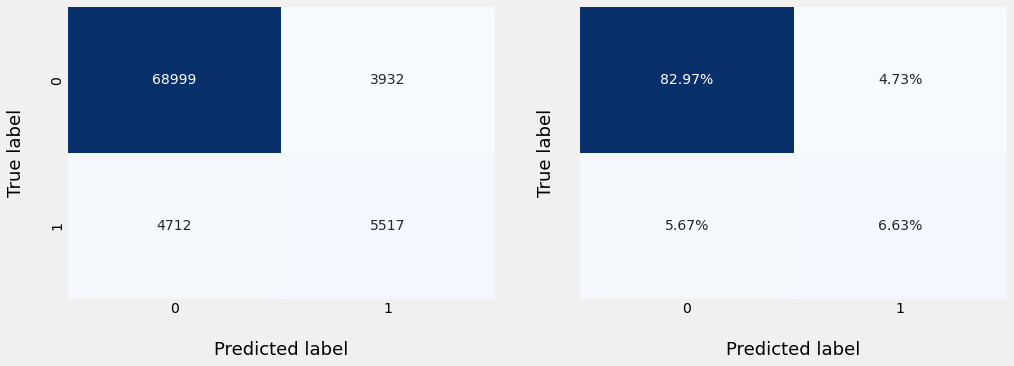

In [36]:
conf_matrix = confusion_matrix (  y_test, y_pred )

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# grafico 1
sbn.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 18)
axes[0].set_ylabel('True label\n', size = 18)

# grafico 2
sbn.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 18)
axes[1].set_ylabel('True label\n', size = 18)
axes[1].yaxis.tick_left()